### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split


In [2]:
lista_alumnos = [["Jalex", 6, 47, 1.80], ["Tomas", 5, 31, 1.80], ["David", 6, 39, 1.81], ["Natalio", 2, 29, 1.73], ["Monica", 3, 47, 1.73], ["Roxanna", 4,24,1.75], ["Filipa", 5,34,1.64], ["Elsa", 4, 36, 1.89], ["Cristina", 3, 46, 1.70], ["Alba", 3, 29, 1.68], ["Valeria",1, 40, 1.60], ["Jose Luis", 4, 47, 1.69], ["Rochi", 2, 38, 1.60], ["Jose Maria", 5, 51, 1.75]]

In [3]:
lalt,ledad=[],[]
for elem in lista_alumnos:
    lalt.append(elem[-1])
    ledad.append(elem[-2])

In [4]:
lalt

[1.8, 1.8, 1.81, 1.73, 1.73, 1.75, 1.64, 1.89, 1.7, 1.68, 1.6, 1.69, 1.6, 1.75]

In [5]:
ledad

[47, 31, 39, 29, 47, 24, 34, 36, 46, 29, 40, 47, 38, 51]

In [14]:
X= np.array(lalt)

In [15]:
X = X.reshape(-1,1)

In [16]:
X.shape

(14, 1)

In [17]:
X

array([[1.8 ],
       [1.8 ],
       [1.81],
       [1.73],
       [1.73],
       [1.75],
       [1.64],
       [1.89],
       [1.7 ],
       [1.68],
       [1.6 ],
       [1.69],
       [1.6 ],
       [1.75]])

In [24]:
y = np.array(ledad)

In [6]:
df = pd.DataFrame({'edad': ledad,'altura' : lalt })

In [7]:
df

,edad,altura
0,47,1.80
1,31,1.80
2,39,1.81
3,29,1.73
4,47,1.73
5,24,1.75
6,34,1.64
7,36,1.89
8,46,1.70
9,29,1.68


In [27]:
def grafreg(X,y, tit):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    plt.scatter(X, y, color='b')
    plt.plot(X, lin_reg.predict(X), color='red')
    plt.title(tit)
    plt.show()

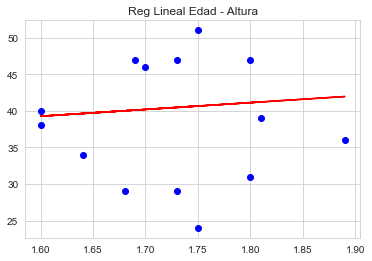

In [31]:
grafreg(df[["altura"]],df[["edad"]], "Reg Lineal Edad - Altura")  # Pasando las cols del DF

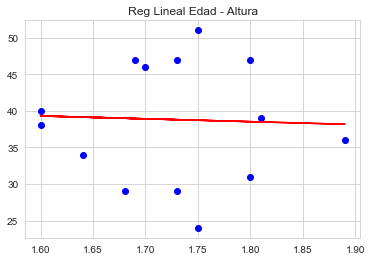

In [29]:
#grafreg(X,y, "Reg Lineal Edad - Altura")  # Pasando las variables con reshape

In [32]:
b = lin_reg.coef_ 
b

array([-3.79159847])

In [33]:
a= lin_reg.intercept_
a

43.391434806328434

In [34]:
#y = a+bx
df["edadmod"] = a+b*df["altura"]


In [17]:
df

,edad,altura,edadmod
0,47,1.80,40.391620
1,31,1.80,40.391620
2,39,1.81,40.474617
3,29,1.73,39.810637
4,47,1.73,39.810637
5,24,1.75,39.976632
6,34,1.64,39.063658
7,36,1.89,41.138598
8,46,1.70,39.561644
9,29,1.68,39.395649


In [35]:
df["err_mod"] = abs(df["edadmod"] - df["edad"])

In [19]:
df

,edad,altura,edadmod,err_mod
0,47,1.80,40.391620,6.608380
1,31,1.80,40.391620,9.391620
2,39,1.81,40.474617,1.474617
3,29,1.73,39.810637,10.810637
4,47,1.73,39.810637,7.189363
5,24,1.75,39.976632,15.976632
6,34,1.64,39.063658,5.063658
7,36,1.89,41.138598,5.138598
8,46,1.70,39.561644,6.438356
9,29,1.68,39.395649,10.395649


### Análisis de los errores

In [36]:
df.err_mod.mean()

6.950880679604083

In [37]:
mae =mean_absolute_error(df.edad,df.edadmod)

In [38]:
mae

6.950880679604083

In [39]:
mse = mean_squared_error(df.edad,df.edadmod)

In [40]:
mse

67.19079711413082

### Matriz de correlación

In [41]:
df.corr()

,edad,altura,edadmod,err_mod
edad,1.000000,-0.016521,0.016521,0.257391
altura,-0.016521,1.000000,-1.000000,0.091968
edadmod,0.016521,-1.000000,1.000000,-0.091968
err_mod,0.257391,0.091968,-0.091968,1.000000


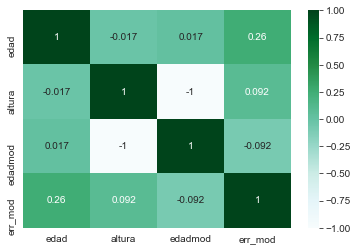

In [42]:
sns.heatmap(df.corr(),cmap="BuGn", annot = True)

In [43]:
df["doble_altura"] = df["altura"]*2

In [44]:
df["doble_edad"] = df["edad"]*2

In [45]:
df

,edad,altura,edadmod,err_mod,doble_altura,doble_edad
0,47,1.80,36.566558,10.433442,3.60,94
1,31,1.80,36.566558,5.566558,3.60,62
2,39,1.81,36.528642,2.471358,3.62,78
3,29,1.73,36.831969,7.831969,3.46,58
4,47,1.73,36.831969,10.168031,3.46,94
5,24,1.75,36.756137,12.756137,3.50,48
6,34,1.64,37.173213,3.173213,3.28,68
7,36,1.89,36.225314,0.225314,3.78,72
8,46,1.70,36.945717,9.054283,3.40,92
9,29,1.68,37.021549,8.021549,3.36,58


### Probando con el doble de la altura y de la edad 

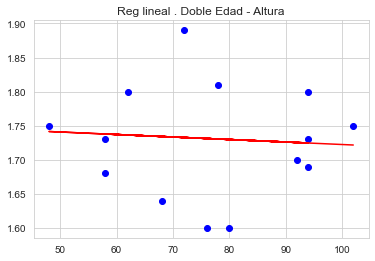

In [46]:
grafreg(df[["doble_edad"]], df[["altura"]], "Reg lineal . Doble Edad - Altura" )

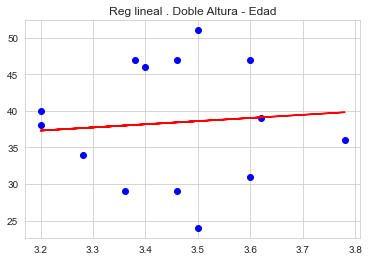

In [47]:
grafreg(df[["doble_altura"]], df[["edad"]], "Reg lineal . Doble Altura - Edad" )